In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

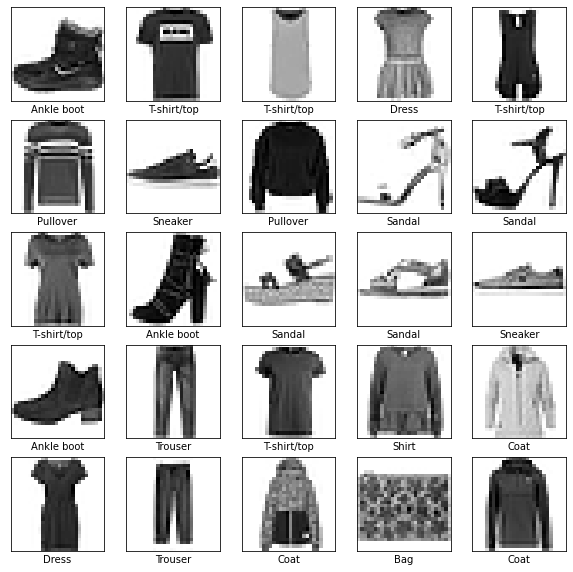

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4997 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3768 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3387 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3170 - accuracy: 0.8826
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2967 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2834 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2694 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2595 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2486 - accuracy: 0.9076
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [9]:
model.predict(test_images)[0]
test_labels[0]

9

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3300 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


In [11]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [12]:
predictions = probability_model.predict(test_images)

In [13]:
predictions[0]

array([9.2099711e-08, 3.1174867e-08, 7.0217937e-10, 2.1220579e-10,
       6.3718351e-09, 2.6440920e-04, 2.1585139e-08, 2.4192849e-02,
       1.3482688e-07, 9.7554249e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

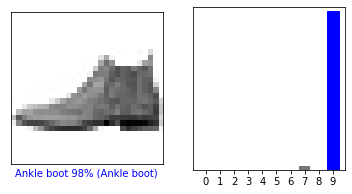

In [16]:
#Os rótulos de predição corretos são azuis e os rótulos de predição incorretos são vermelhos.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

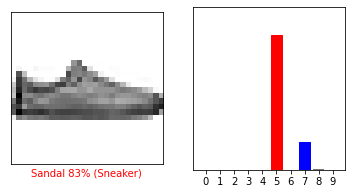

In [17]:
#Os rótulos de predição corretos são azuis e os rótulos de predição incorretos são vermelhos.
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

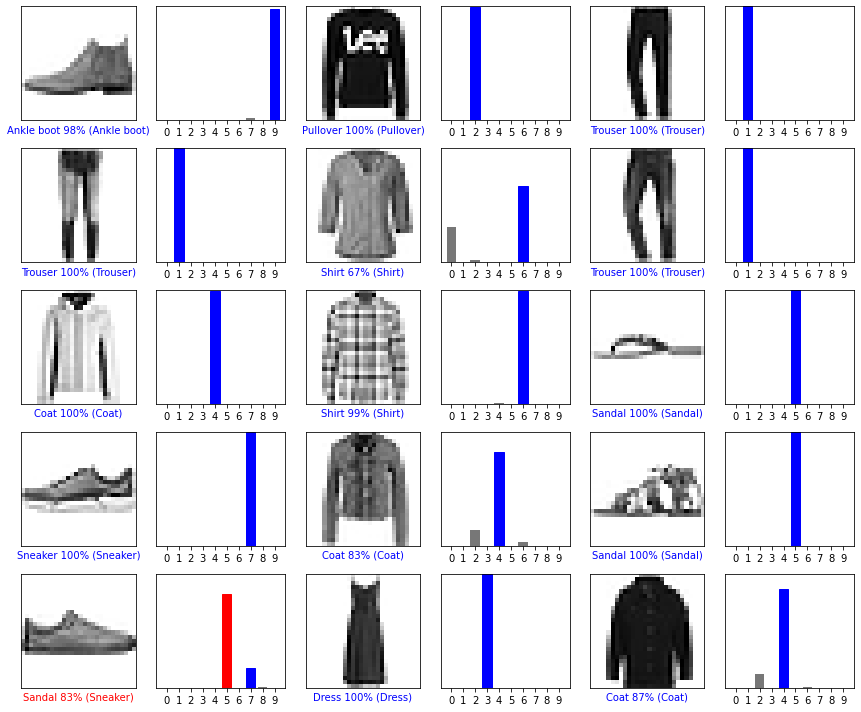

In [18]:
#plota várias imagens com suas previsões.
# Plote as primeiras imagens de teste X, seus rótulos previstos e os rótulos verdadeiros.
# Pinte as previsões corretas em azul e as previsões incorretas em vermelho. 
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [19]:
#Pegue uma imagem do conjunto de dados de teste. 
img = test_images[1]

print(img.shape)

(28, 28)


In [20]:
#Adicione a imagem a um lote onde ela seja o único membro. 
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [21]:
#prever o rótulo correto para esta imagem:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9698491e-04 8.0115831e-11 9.9648857e-01 1.3494829e-09 1.7961186e-03
  2.4417143e-10 1.5085645e-03 2.4064164e-12 9.8097153e-06 1.9896361e-11]]


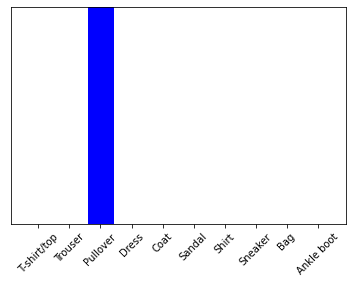

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [24]:
np.argmax(predictions_single[0])

2